# Generalized Mode Volume Approach Using Dyadic Greens Functions

- reproduce results of #Kristensen2010 for effective mode volume of a photonic crystal membrane defect. 
- analyze results using dyadic formulation of morphhology-depended resonances (MDRs) (Lee 1999)
- compare to approximate analytic expressions
    - practical field expansion using technique of #Kristensen2010



## Sources

- `Kristensen, P. T., C. Van Vlack, and S. Hughes. “Generalized Effective Mode Volume for Leaky Optical Cavities.” Optics Letters 37, no. 10 (May 15, 2012): 1649. https://doi.org/10.1364/OL.37.001649.`
- `Kristensen, Philip Trøst, Peter Lodahl, and Jesper Mørk. “Light Propagation in Finite-Sized Photonic Crystals: Multiple Scattering Using an Electric Field Integral Equation.” J. Opt. Soc. Am. B 27, no. 2 (February 2010): 228–37. https://doi.org/10.1364/JOSAB.27.000228.`
- `Lee, Leung, and Pang, “Dyadic Formulation of Morphology-Dependent Resonances I Completeness Relation.”`
- `Yao, P., V.S.C. Manga Rao, and S. Hughes. “On-Chip Single Photon Sources Using Planar Photonic Crystals and Single Quantum Dots: On-Chip Single Photon Sources Using Planar Photonic Crystals.” Laser & Photonics Reviews 4, no. 4 (June 25, 2010): 499–516. https://doi.org/10.1002/lpor.200810081.`



## Problem Setup


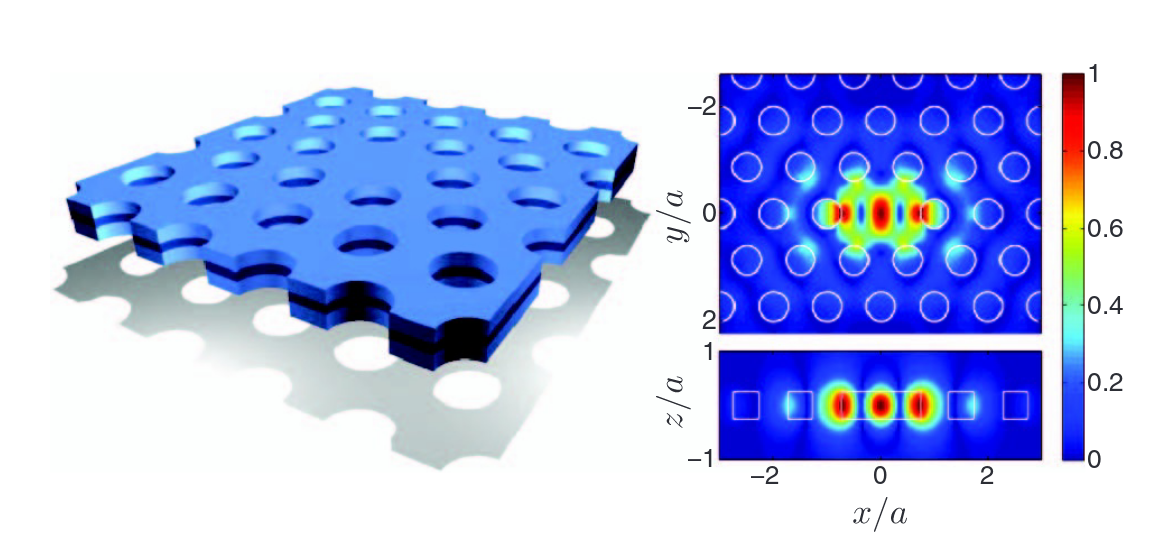

In [4]:
from IPython.display import Image
Image(filename='img/photonic_crystal_ge_2012.png')

Here is the idea:

1. start with an infinite photonic crystal membrane
2. remove 1 hole (make a defect) from the plane
3. defect prevents in-plane propagation
4. create cavity, where field leaks out of plane 

## Transmission Spectra

We can calculate the tranmission spectra with and without the cavity. We divide out by the original system (no defect). We should see a spike near the cavity resonance.

In [ ]:
sim_orig.reset_meep()

In [34]:
import meep as mp
import numpy as np

In [35]:
resolution = 5.0 #pixels/unit_length
r = 0.275
eps = 12.0
h = 0.5
N = 10 #number of holes on  left/right/above/below the defect

crystal_size = 2*N
pad = 2
dpml = 1
Lz = 3
sxy = 2*pad+2*dpml+crystal_size
sz = h + 2*Lz + 2*dpml


cell = mp.Vector3(sxy,sxy,sz)

blk = mp.Block(mp.Vector3(mp.inf,mp.inf,h), material=mp.Medium(epsilon=eps))
geometry = [blk]

from itertools import product

rng_x = range(-N,N+1)
rng_y = range(-N,N+1)

for i,j in product(rng_x,rng_x):
    if i == 0 and j== 0:
        continue
    geometry.append(mp.Cylinder(r, center=mp.Vector3(i,j),height=mp.inf))
   
pml_layers = [mp.PML(dpml)]

fcen=0.31
df = 0.2
sym = [mp.Mirror(mp.Y, phase=-1), mp.Mirror(mp.X, phase=-1)]

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df),mp.Ez,mp.Vector3(0.3,0,1))]

sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    boundary_layers=pml_layers,
    sources=src,
    resolution=resolution,
)

In [36]:
resolution = 20 #pixels/unit_length
r = 0.275
eps = 12.0
h = 0.5
N = 3 #number of holes on  left/right/above/below the defect

crystal_size = 2*N
pad = 2
dpml = 1
Lz = 3
sxy = 2*pad+2*dpml+crystal_size
sz = h + 2*Lz + 2*dpml


cell = mp.Vector3(sxy,sxy,sz)

blk = mp.Block(mp.Vector3(mp.inf,mp.inf,h), material=mp.Medium(epsilon=eps))
geometry = [blk]

from itertools import product

rng_x = range(-N,N+1)
rng_y = range(-N,N+1)

for i,j in product(rng_x,rng_x):
    geometry.append(mp.Cylinder(r, center=mp.Vector3(i,j),height=mp.inf))
   
pml_layers = [mp.PML(dpml)]

fcen=0.4
df = 0.2

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df),mp.Ey,mp.Vector3(-.5*sxy+dpml,0,0),size=mp.Vector3(0,crystal_size,0))]

sim_orig = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    boundary_layers=pml_layers,
    sources=src,
    resolution=resolution,
)

We now compute the flux at the other end of the cell.


In [37]:
freg = mp.FluxRegion(
    center=mp.Vector3(.5*sxy -dpml -.5), size=mp.Vector3(0,sxy,2*h)
)

nfreq = 500

trans = sim_orig.add_flux(fcen,df,nfreq,freg)

In [38]:
sim.init_sim()

eps_data = sim.get_epsilon()

-----------
Initializing structure...
time for choose_chunkdivision = 0.00857902 s
Working in 3D dimensions.
Computational cell is 26 x 26 x 8.6 with resolution 5
     block, center = (0,0,0)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-10,-10,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10,-9,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10,-8,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10,-7,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-10,-6,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
     

Finally we plot the setup to see if it looks ok.


     block, center = (0,0,0)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-3,-3,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,-2,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,-1,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,0,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,1,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,2,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant eps

<AxesSubplot:xlabel='X', ylabel='Y'>

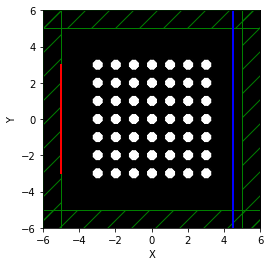

In [39]:
mp.plot2D(sim_orig,output_plane=mp.Volume(mp.Vector3(0),mp.Vector3(sxy,sxy)))

Now we run until the Ey field has decayed by a factor of 1000

-----------
Initializing structure...
time for choose_chunkdivision = 0.00141883 s
Working in 3D dimensions.
Computational cell is 12 x 12 x 8.5 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (-3,-3,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,-2,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,-1,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,0,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-3,1,0)
          radius 0.275, height 1e+20, axis (0, 0, 1)
          di

KeyboardInterrupt: 

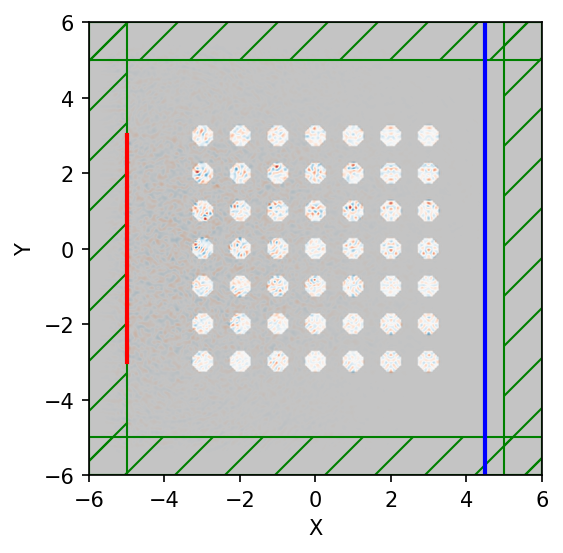

In [40]:
import matplotlib.pyplot as plt

plt_slice = mp.Volume(mp.Vector3(0),mp.Vector3(sxy,sxy))
f = plt.figure(dpi=150)
animate = mp.Animate2D(sim, f=f, fields=mp.Ez, realtime=False, normalize=True)

sim_orig.run(
    mp.during_sources(mp.at_every(0.4, mp.in_volume(plt_slice,animate))),
    until_after_sources=mp.stop_when_fields_decayed(
        50, mp.Ey, mp.Vector3(0.5 * sxy - dpml - 0.5), 1e-3
    ),
)
plt.close()

In [4]:
%gui qt
from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

libpng warning: iCCP: known incorrect sRGB profile


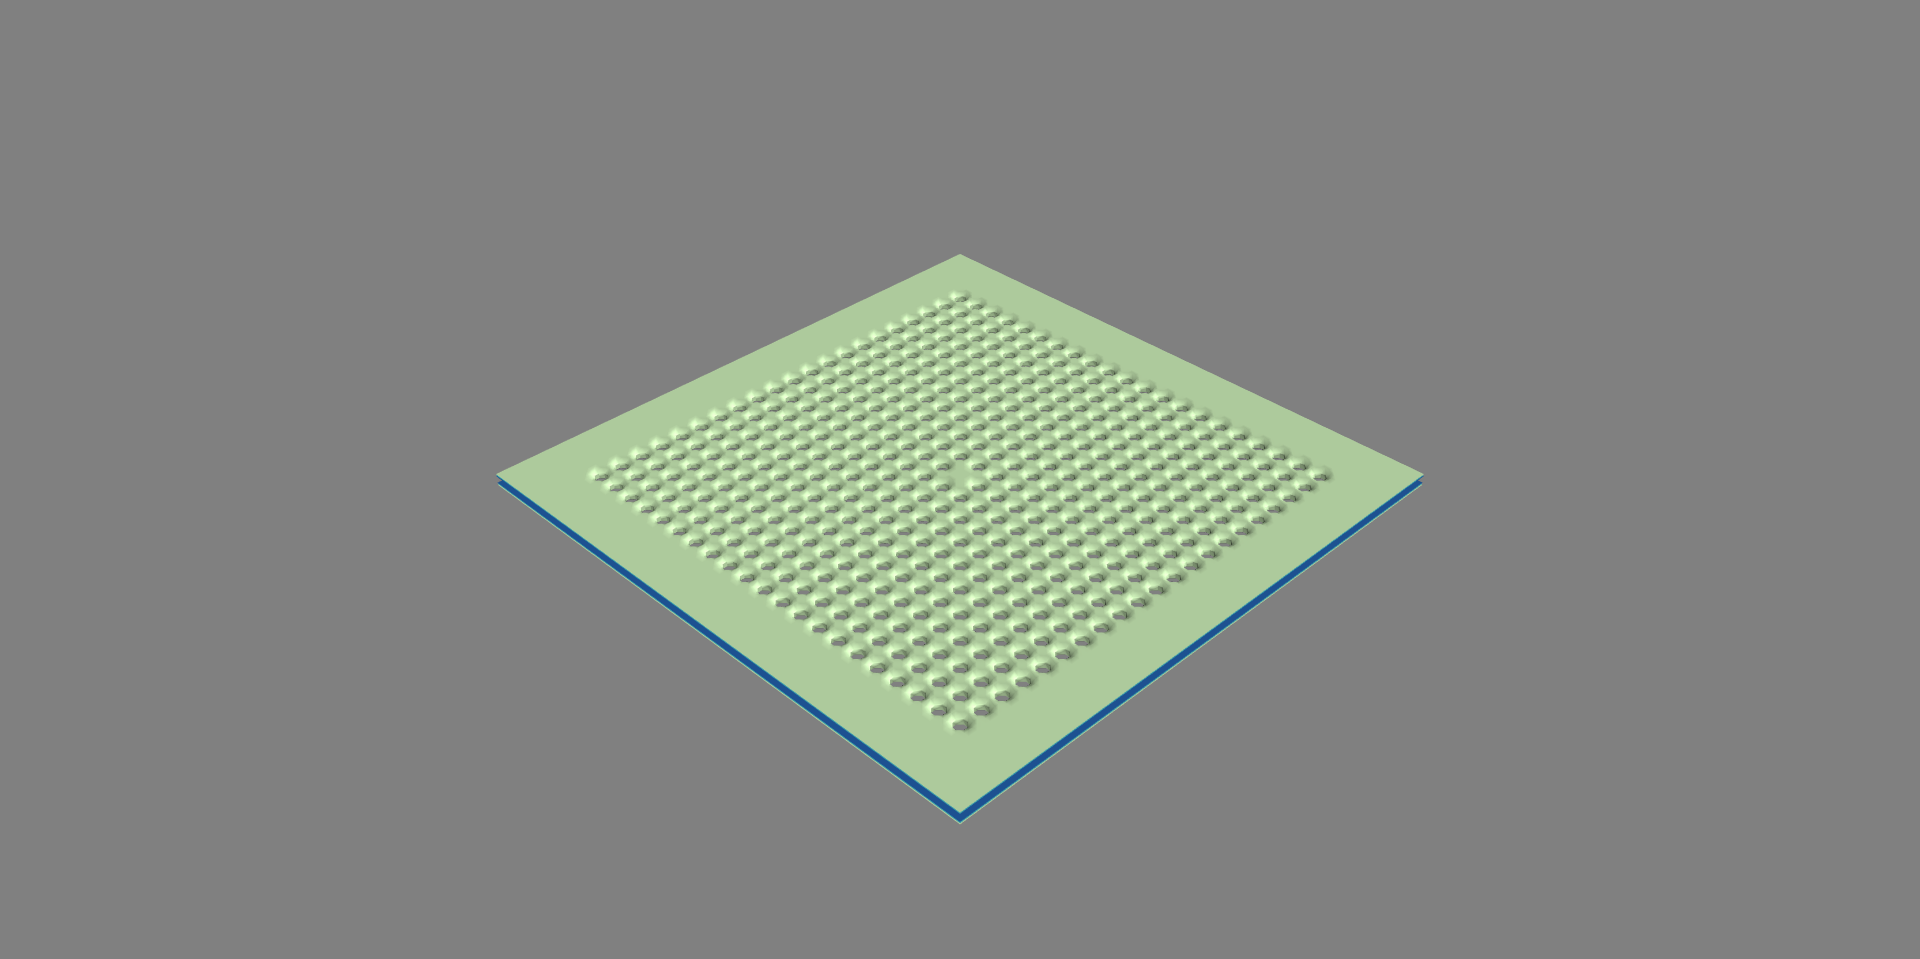

In [10]:
from IPython.display import Image
Image(filename='img/meep_crystal.png')

In [ ]:
import os

from mayavi import mlab
mlab.test_plot3d()

In [5]:
#Analyze response


sim.restart_fields()
h = mp.Harminv(mp.Ez, mp.Vector3(), fcen, df)
sim.run(mp.after_sources(h),  until_after_sources=400)

FloatProgress(value=0.0, description='0% done ', max=450.0)

Meep progress: 2.5/450.0 = 0.6% done in 4.0s, 721.9s to go
on time step 25 (time=2.5), 0.160652 s/step
Meep progress: 10.8/450.0 = 2.4% done in 8.0s, 327.0s to go
on time step 108 (time=10.8), 0.0482701 s/step
Meep progress: 19.3/450.0 = 4.3% done in 12.0s, 268.8s to go
on time step 193 (time=19.3), 0.0470847 s/step
Meep progress: 28.0/450.0 = 6.2% done in 16.1s, 242.2s to go
on time step 280 (time=28), 0.0462202 s/step
Meep progress: 35.5/450.0 = 7.9% done in 20.1s, 234.5s to go
on time step 355 (time=35.5), 0.0534771 s/step
Meep progress: 43.0/450.0 = 9.6% done in 24.1s, 228.3s to go
on time step 430 (time=43), 0.0537997 s/step
Meep progress: 50.0/450.0 = 11.1% done in 28.2s, 225.2s to go
on time step 500 (time=50), 0.0576381 s/step
Meep progress: 58.2/450.0 = 12.9% done in 32.2s, 216.6s to go
on time step 582 (time=58.2), 0.0490581 s/step
Meep progress: 66.5/450.0 = 14.8% done in 36.2s, 208.8s to go
on time step 665 (time=66.5), 0.0486378 s/step
Meep progress: 74.10000000000001/450.

In [12]:

# 2D slice of Ez data
size_xy = 25
slice2d = sim.get_array(mp.Hz,center=mp.Vector3(0,0,1),size=mp.Vector3(size_xy,size_xy))


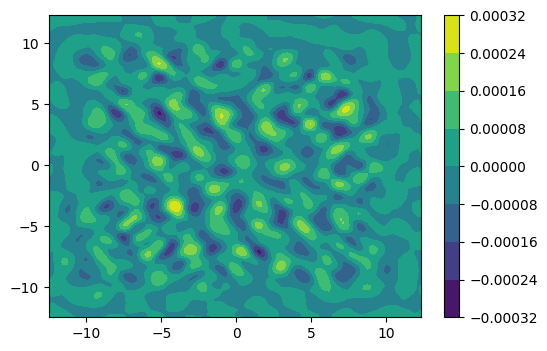

In [13]:
import matplotlib.pyplot as plt
# plot 2D slice
plt.figure(dpi=100)
sMax = 0.5*size_xy
sMin = -0.5*size_xy
dy = (sMax - sMin) / slice2d.shape[1]
dx = (sMax - sMin) / slice2d.shape[0]
(x2d, y2d) = np.mgrid[slice(sMin, sMax, dx), slice(sMin, sMax, dy)]
plt.contourf(x2d, y2d, slice2d)
plt.colorbar()
plt.show()
